# Exercise 13:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

1. Loading and visualizing data 1/1
2. Logistic classifier 2/2
3. Bootstrapped accuracy 3/3
4. Permutation test for grey matter effects 3/3
5. Reflection 1/1

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [ ]:
# WRITE YOUR CODE HERE
# setwd("../Homework datasets/hcp_data") # Uncomment this when running for the first time
library(tidyverse)

hcp <- read.csv('unrestricted_trimmed_1_7_2020_10_50_44.csv')
d1 <- hcp[c('Subject', 'Gender', 'Flanker_Unadj', 'FS_IntraCranial_Vol', 'FS_Tot_WM_Vol', 'FS_Total_GM_Vol')] |>
    drop_na()
d1$Gender<-as.factor(d1$Gender)
# colnames(hcp)
head(d1)



,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<fct>,<dbl>,<dbl>,<int>,<int>
1,100206,M,130.42,1864518,543134,807245
2,100307,F,112.56,1512540,407292,664124
3,100408,M,121.18,1684117,500417,726206
4,100610,M,126.53,1816044,512946,762308
5,101006,F,101.85,1437868,429449,579632
6,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color).

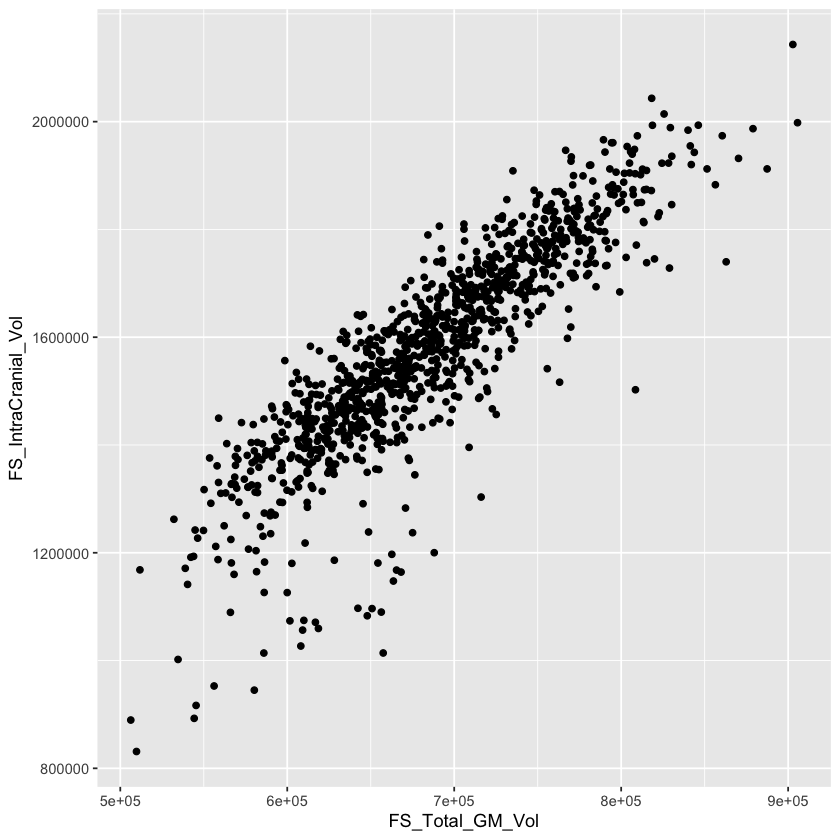

In [ ]:
# WRITE YOUR CODE HERE
ggplot(data = d1, mapping = aes(x = FS_Total_GM_Vol, y = FS_IntraCranial_Vol)) +
    geom_point()


What patterns do you observe in the scatter plot?

> *Write your response here*
>
> There appears to be a linear relationship between total grey matter volume and intracranial volume.
> A larger total grey matter volume corresponds to a larger intracranial volume.

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume.

In [ ]:
# WRITE YOUR CODE HERE
glm.fit = glm(Gender ~ FS_Tot_WM_Vol+FS_Total_GM_Vol+FS_IntraCranial_Vol,
	data=d1, family=binomial)

summary(glm.fit)



Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = binomial, data = d1)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> *Write your response here*
>
> Based on the p values, the total grey matter volume and the intracranial volume are significantly associated with gender.

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [ ]:
# WRITE YOUR CODE HERE
glm_prob_df = data.frame(predict(glm.fit, type = "response"))
colnames(glm_prob_df) = c('Predicted_Gender_Prob')


threshold = 0.50 #binarizing threshold

# First make a list of predictions
glm_prob_df$Predicted_Gender="F" # initialize to 0

# Then use the probability output to label the M's
glm_prob_df$Predicted_Gender[glm_prob_df$Predicted_Gender_Prob>threshold]="M"

# Convert to categorical again
glm_prob_df$Predicted_Gender = as.factor(glm_prob_df$Predicted_Gender)

# Add actual data
glm_prob_df$Actual_Gender = d1$Gender

head(glm_prob_df)

# Now let's look at the prediction accuracy
confusion_df = data.frame(glm_prob_df$Predicted_Gender, glm_prob_df$Actual_Gender)
colnames(confusion_df) = c('Predicted', 'Actual')
table(confusion_df)

# Calculate accuracy
accuracy <- mean(glm_prob_df$Predicted_Gender == glm_prob_df$Actual_Gender)

# Print the result
print(paste("Accuracy:", accuracy))




,Predicted_Gender_Prob,Predicted_Gender,Actual_Gender
,<dbl>,<fct>,<fct>
1,0.97633865,M,M
2,0.24207122,F,F
3,0.75683279,M,M
4,0.92633475,M,M
5,0.04212663,F,F
6,0.24936028,F,M


         Actual
Predicted   F   M
        F 516 110
        M  90 397

[1] "Accuracy: 0.820305480682839"


What is the prediction accuracy for gender from the full model?

>*Write your response here*
>
> The accuracy is approximately 82.03%.

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model (i.e., the confidence of the correlation between $\hat{y}$ and $y$). Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


[1] 0.8203055
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_obj, type = "perc")

Intervals : 
Level     Percentile     
95%   ( 0.7925,  0.8436 )  
Calculations and Intervals on Original Scale


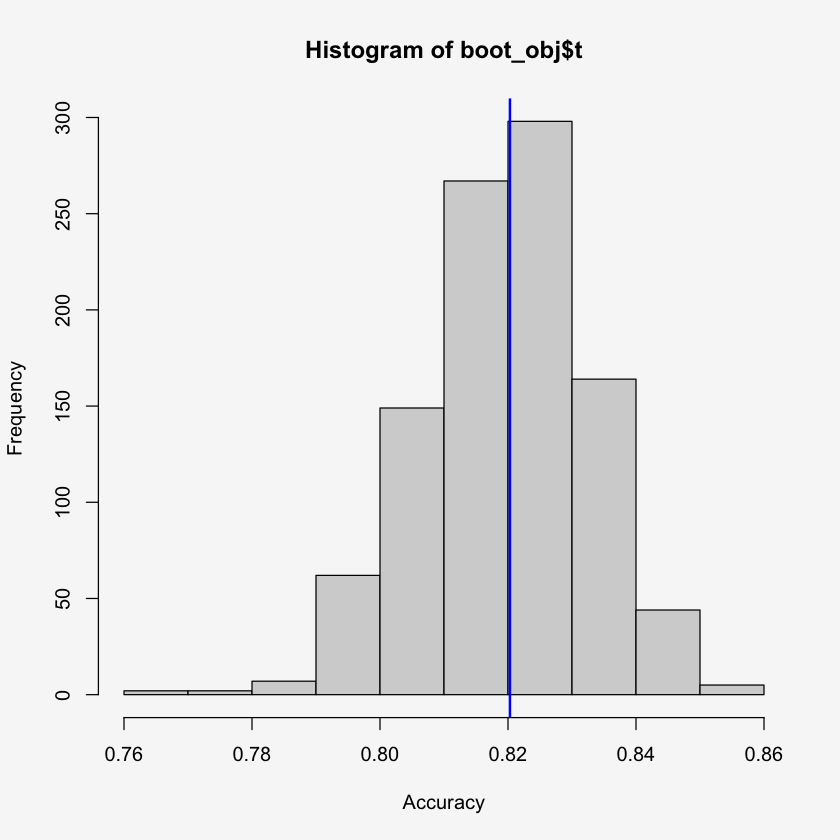

In [ ]:
# WRITE YOUR CODE HERE
library(boot)

# The function needs two inputs: Data, Index
boot.fn <- function(data, index){
    d1_s <- d1[index,] # a subset of d1
    boot_fit = glm(Gender ~ FS_Tot_WM_Vol+FS_Total_GM_Vol+FS_IntraCranial_Vol,
	    data=d1_s, family=binomial)
    boot_prob = data.frame(predict(boot_fit, type = "response"))
    boot_classes <- factor(ifelse(boot_prob > 0.5, "M", "F"))
    actual_classes <- d1_s$Gender
    boot_accuracy <- mean(boot_classes == actual_classes)

    return(boot_accuracy)
}


# Check if the function is defined correctly
orig_accuracy = boot.fn(d1, 1:nrow(d1))
print(orig_accuracy)


# Run bootstrap
boot_obj = boot(d1, boot.fn ,R=1000) #R=repetitions

# Plot the bootstrap accuracy results
par(bg = "#f7f7f7") # Force background color
hist(boot_obj$t, xlab="Accuracy")
abline(v = orig_accuracy, col = "blue", lwd = 2)

# Show the conficence interval (95%)
print(boot.ci(boot_obj, type = "perc"))

How robust is the prediction accuracy of the full model?

> *Write your response here*
>
> The original confidence interval 82.03% is within the 95% confidence interval $(79.51\%, 84.27\%)$, which means that the prediction accuracy of the full model is quite robust.

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

[1] 0.8203055


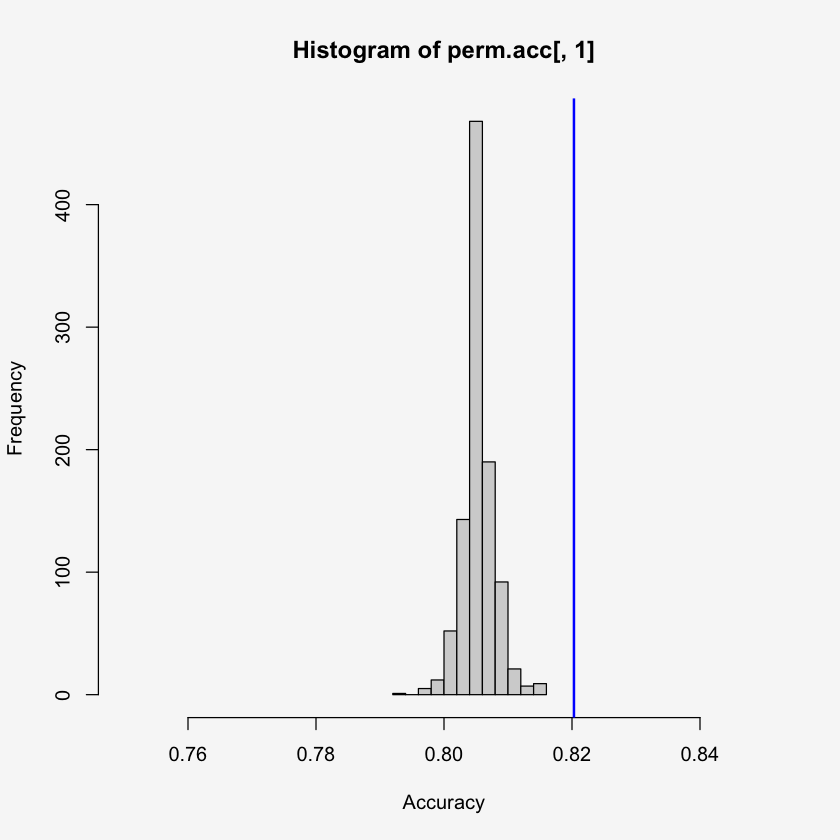

In [ ]:
# WRITE YOUR CODE HERE
set.seed(123)  # For reproducibility

# First let's make a copy of the data set that we'll keep permuting
perm_d1 <- d1 #want to preserve the non-permuted, true form of data!

# Set the number of iterations
R=1000

# Next smake an output object to store the results
perm.acc=matrix(NA, nrow=R, ncol=1) #filling with nas at first

# Define columns to shuffle (all except "Gender")
columns_to_shuffle <- c('FS_Total_GM_Vol')

# Now just write a for loop where we scramble the observations
# in X using the sample() function. We'll scramble the observations in R different ways
for (i in 1:R){
  perm_d1[columns_to_shuffle] <- lapply(d1[columns_to_shuffle], function(x) sample(x)) # This is a shuffle

  perm_fit = glm(Gender ~ FS_Tot_WM_Vol+FS_Total_GM_Vol+FS_IntraCranial_Vol,
    data=perm_d1, family=binomial)
  perm_prob = data.frame(predict(perm_fit, type = "response"))
  perm_classes <- factor(ifelse(perm_prob > 0.5, "M", "F"), levels=unique(d1$Gender))
  actual_classes <- d1$Gender
  perm_accuracy <- mean(perm_classes == actual_classes)

  perm.acc[i,]=perm_accuracy
}

# Take a look at the null distributions
par(bg = "#f7f7f7") # Force background color
# print(perm.acc)
print(orig_accuracy)
hist(perm.acc[,1], xlab="Accuracy", xlim=c(0.75, 0.85))
abline(v = orig_accuracy, col = "blue", lwd = 2)


How much does the grey matter volume influence the prediction accuracy of the model?

> *Write your response here*
>
> The prediction accuracy is significantly influenced by the grey matter volume, as the original accuracy is outside of the 95% confidence interval of the accuracy of permutated data.

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> *Write your response here*
>
> In a sense, bootstrapping replaces some random samples with other samples in the dataset and provides a distribution of possible fitted models. We can use bootstrapping to estimate the confidence interval of the model and demonstrate the stability of the model. We can also use it to reduce model bias.
>
> Permutation basically scrambles a few features or independent variables amongst all the samples. This can help us determine the significance of certain variables and their independence.

**DUE:** 5pm EST, March 26, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*